In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('ds_salaries.csv')

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.7167

In [4]:
print("Частота по должностям:")
print(data['job_title'].value_counts())

Частота по должностям:
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64


In [5]:
print("Частота по уровню опыта:")
print(data['experience_level'].value_counts())

Частота по уровню опыта:
SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64


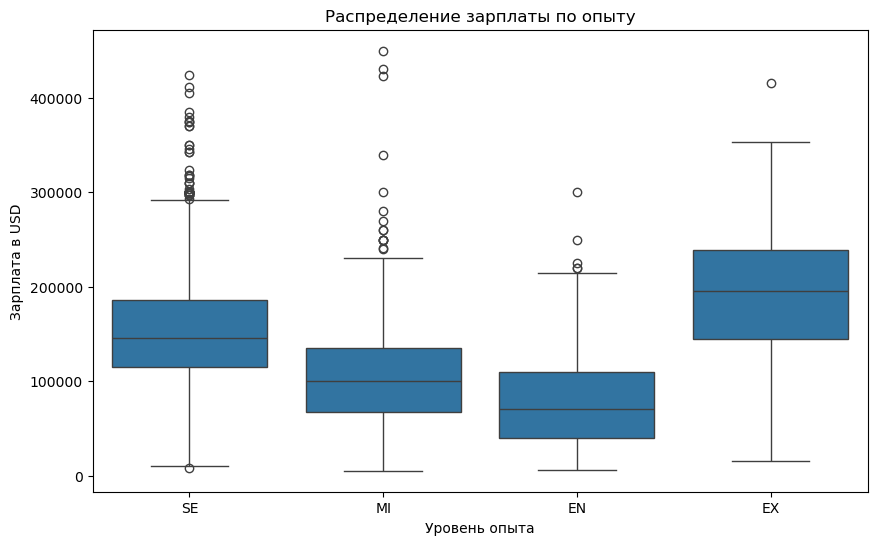

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Распределение зарплаты по опыту')
plt.xlabel('Уровень опыта')
plt.ylabel('Зарплата в USD')
plt.show()

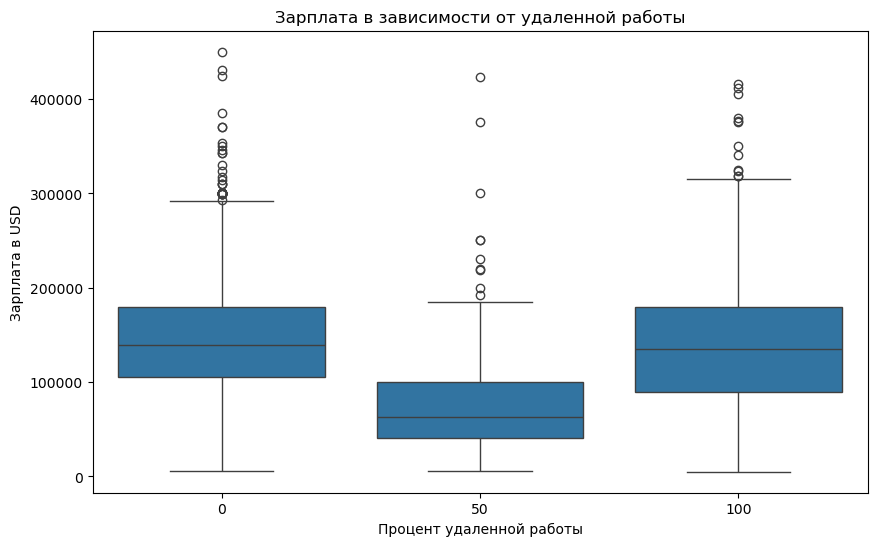

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.title('Зарплата в зависимости от удаленной работы')
plt.xlabel('Процент удаленной работы')
plt.ylabel('Зарплата в USD')
plt.show()

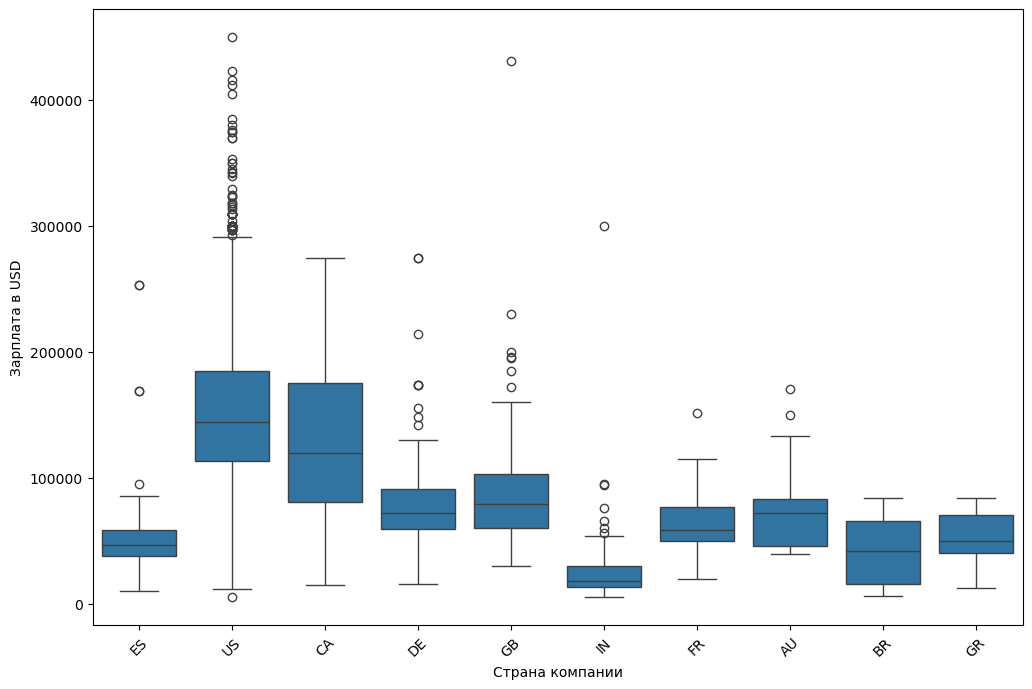

In [8]:
plt.figure(figsize=(12, 8))
top_countries = data['company_location'].value_counts().head(10).index
sns.boxplot(x='company_location', y='salary_in_usd', data=data[data['company_location'].isin(top_countries)])
plt.xlabel('Страна компании')
plt.ylabel('Зарплата в USD')
plt.xticks(rotation=45)
plt.show()


In [9]:
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [10]:
duplicates = data.duplicated()
print(f"Количество дубликатов: {duplicates.sum()}")

Количество дубликатов: 1171


In [11]:
data_cleaned = data.drop_duplicates()
after_removal = data_cleaned.duplicated()
print(f"Количество дубликатов после удаления: {after_removal.sum()}")

Количество дубликатов после удаления: 0


In [12]:
top_10_paid = data_cleaned[['job_title', 'salary_in_usd']].sort_values(by='salary_in_usd', ascending=False).head(10)
print(top_10_paid)
# самые высокооплачиваемые Research Scientist, Data Analyst, AI Scientist. Есть значительные выбросы 

                               job_title  salary_in_usd
3522                  Research Scientist         450000
2011                        Data Analyst         430967
528                         AI Scientist         423834
3747  Applied Machine Learning Scientist         423000
3675            Principal Data Scientist         416000
3750                      Data Scientist         412000
3463                 Data Analytics Lead         405000
1288                        Data Analyst         385000
3468              Applied Data Scientist         380000
649                       Data Architect         376080


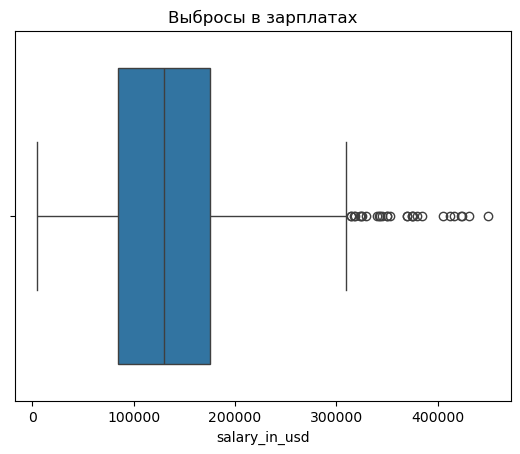

In [21]:
sns.boxplot(x=data_cleaned['salary_in_usd'])
plt.title('Выбросы в зарплатах')
plt.show()

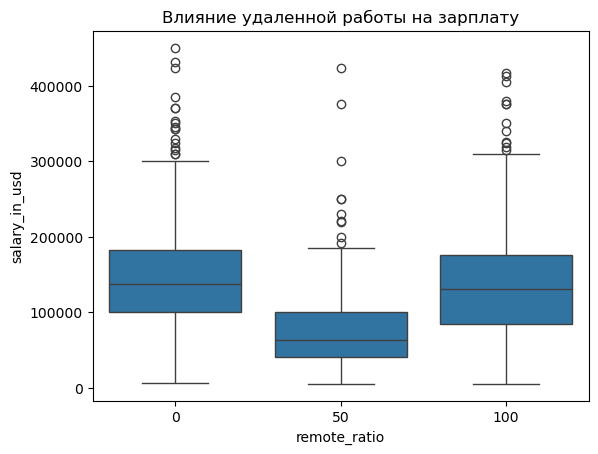

In [13]:
sns.boxplot(x=data_cleaned['remote_ratio'], y=data_cleaned['salary_in_usd'])
plt.title('Влияние удаленной работы на зарплату')
plt.show()

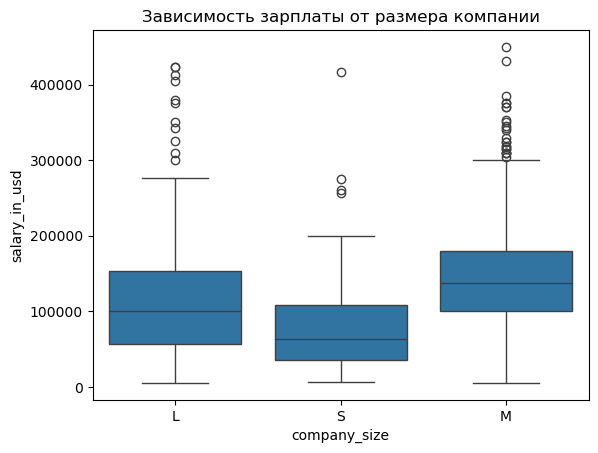

In [24]:
sns.boxplot(x=data_cleaned['company_size'], y=data_cleaned['salary_in_usd'])
plt.title('Зависимость зарплаты от размера компании')
plt.show()

In [25]:
country_salary_avg = data_cleaned.groupby('company_location')['salary_in_usd'].mean()
print(country_salary_avg)

company_location
AE    100000.000000
AL     10000.000000
AM     50000.000000
AR     25000.000000
AS     29351.000000
          ...      
TH     23064.333333
TR     19058.000000
UA     57850.000000
US    152374.791602
VN     12000.000000
Name: salary_in_usd, Length: 72, dtype: float64


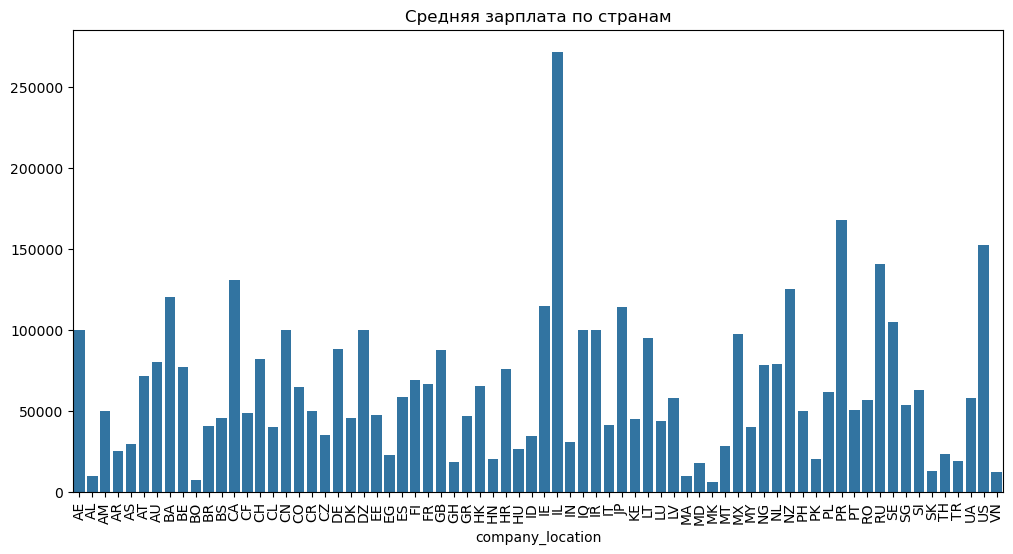

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=country_salary_avg.index, y=country_salary_avg.values)
plt.xticks(rotation=90)
plt.title('Средняя зарплата по странам')
plt.show()

In [28]:
salary_median = data_cleaned.groupby('job_title')['salary_in_usd'].median()
print(salary_median)

job_title
3D Computer Vision Researcher     15000.0
AI Developer                     108000.0
AI Programmer                     55000.0
AI Scientist                      52500.0
Analytics Engineer               143860.0
                                   ...   
Research Engineer                155000.0
Research Scientist               145900.0
Software Data Engineer            62510.0
Staff Data Analyst                15000.0
Staff Data Scientist             105000.0
Name: salary_in_usd, Length: 93, dtype: float64


In [29]:
comparison = data[data['work_year'].isin([2020, 2023])]

In [30]:
comparison = comparison.pivot_table('salary_in_usd', 'job_title', 'work_year', aggfunc='median')

In [31]:
comparison['change_in_salary'] = comparison[2023] - comparison[2020]

In [32]:
comparison.sort_values('change_in_salary', ascending=False, inplace=True)
print(comparison)

work_year                                    2020      2023  change_in_salary
job_title                                                                    
AI Scientist                              45896.0  231232.5          185336.5
ML Engineer                               15966.0  180000.0          164034.0
Computer Vision Engineer                  60000.0  212500.0          152500.0
Machine Learning Infrastructure Engineer  50180.0  171600.0          121420.0
Data Scientist                            62726.0  155500.0           92774.0
...                                           ...       ...               ...
Machine Learning Software Engineer            NaN  175000.0               NaN
NLP Engineer                                  NaN  205000.0               NaN
Research Engineer                             NaN  152500.0               NaN
Software Data Engineer                        NaN   62510.0               NaN
Staff Data Analyst                        15000.0       NaN     

In [33]:
highest_paid = data.loc[data['salary_in_usd'].idxmax()]

print("highest_paid")
print("Должность:", highest_paid['job_title'])
print("Страна:", highest_paid['employee_residence'])
print("Удаленная работа:", "Да" if highest_paid['remote_ratio'] > 50 else "Нет")
print("Зарплата в USD:", highest_paid['salary_in_usd'])

highest_paid
Должность: Research Scientist
Страна: US
Удаленная работа: Нет
Зарплата в USD: 450000


In [34]:
residence_counts = data['employee_residence'].value_counts()

remote_counts = data[data['remote_ratio'] > 0]['employee_residence'].value_counts()

location_data = pd.DataFrame({
    'total_employees': residence_counts,
    'remote_employees': remote_counts
})

In [35]:
location_data['remote_percentage'] = (location_data['remote_employees'] / location_data['total_employees']) * 100

location_data.sort_values(by='total_employees', ascending=False, inplace=True)

location_data.head()
# высокий уровень удаленной работы наблюдается в Индии (85,9%) и Канаде (67,1%)

,total_employees,remote_employees,remote_percentage
US,3004,1337.0,44.507324
GB,167,77.0,46.107784
CA,85,57.0,67.058824
ES,80,31.0,38.750000
IN,71,61.0,85.915493
